## SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Oversampling Technique) is a technique used in machine learning to address unbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.90])

In [3]:
print("array_x: " + str(x))
print("array_y: " + str(y))

array_x: [[-0.38237941 -2.35581224]
 [ 1.32514102 -0.70528496]
 [ 0.48412088 -1.50935426]
 ...
 [ 0.46367679 -1.58714338]
 [ 0.67397137 -1.39447237]
 [-1.09922438 -0.55535701]]
array_y: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0

In [4]:
import numpy as np
import pandas as pd

In [5]:
df_01 = pd.DataFrame(x, columns = ["feature_01", "feature_02"])
df_02 = pd.DataFrame(y, columns = ["target"])
final_df = pd.concat([df_01, df_02], axis = 1)

In [7]:
final_df.head()

,feature_01,feature_02,target
0,-0.382379,-2.355812,0
1,1.325141,-0.705285,0
2,0.484121,-1.509354,0
3,1.432956,-0.653514,0
4,2.009216,0.141238,0


In [8]:
print("The shape of the final data frame is: " + str(final_df.shape))

The shape of the final data frame is: (1000, 3)


In [11]:
final_df["target"].value_counts()

0    899
1    101
Name: target, dtype: int64

In [12]:
final_df.reset_index(drop = True, inplace = True)

In [13]:
final_df.tail()

,feature_01,feature_02,target
995,1.663634,-0.236006,0
996,0.907571,-1.120458,0
997,0.463677,-1.587143,0
998,0.673971,-1.394472,0
999,-1.099224,-0.555357,1


In [15]:
import matplotlib.pyplot as plt

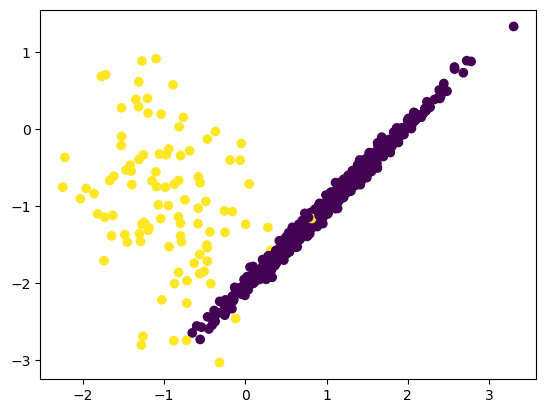

In [17]:
plt.scatter(final_df["feature_01"], final_df["feature_02"], c = final_df["target"])

In [20]:
from imblearn.over_sampling import SMOTE

In [24]:
oversample = SMOTE()
x, y = oversample.fit_resample(final_df[["feature_01","feature_02"]], final_df["target"])

In [26]:
print(x)
print(y)

      feature_01  feature_02
0      -0.382379   -2.355812
1       1.325141   -0.705285
2       0.484121   -1.509354
3       1.432956   -0.653514
4       2.009216    0.141238
...          ...         ...
1793   -0.986721   -1.067251
1794   -0.801200    0.287975
1795   -0.893489   -0.710617
1796   -1.279548   -1.348779
1797   -1.391894   -1.431114

[1798 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1793    1
1794    1
1795    1
1796    1
1797    1
Name: target, Length: 1798, dtype: int64


In [27]:
df_01 = pd.DataFrame(x, columns = ["feature_01", "feature_02"])
df_02 = pd.DataFrame(y, columns = ["target"])
oversample_df = pd.concat([df_01, df_02], axis = 1)

In [28]:
oversample_df.head()

,feature_01,feature_02,target
0,-0.382379,-2.355812,0
1,1.325141,-0.705285,0
2,0.484121,-1.509354,0
3,1.432956,-0.653514,0
4,2.009216,0.141238,0


In [29]:
oversample_df["target"].value_counts()

0    899
1    899
Name: target, dtype: int64

In [30]:
oversample_df

,feature_01,feature_02,target
0,-0.382379,-2.355812,0
1,1.325141,-0.705285,0
2,0.484121,-1.509354,0
3,1.432956,-0.653514,0
4,2.009216,0.141238,0
...,...,...,...
1793,-0.986721,-1.067251,1
1794,-0.801200,0.287975,1
1795,-0.893489,-0.710617,1
1796,-1.279548,-1.348779,1
